# Sample Usage: Portfolio Optimization

### Introduction

This tutorial shows how to solve the following mean-variance portfolio optimization problem for $n$ assets:

$$\begin{aligned}
\min_{x \in \{0, 1\}^n}  q x^T \Sigma x - \mu^T x\\
\text{subject to: } 1^T x = B
\end{aligned}$$

where we use the following notation:

- $x \in \{0, 1\}^n$ denotes the vector of binary decision variables, which indicate which assets to pick ($x[i] = 1$) and which not to pick ($x[i] = 0$),
- $\mu \in \mathbb{R}^n$ defines the expected returns for the assets,
- $\Sigma \in \mathbb{R}^{n \times n}$ specifies the covariances between the assets,
- $q > 0$ controls the risk appetite of the decision maker,
- and $B$ denotes the budget, i.e. the number of assets to be selected out of $n$.

We assume the following simplifications:
- all assets have the same price (normalized to 1),
- the full budget $B$ has to be spent, i.e. one has to select exactly $B$ assets.

The equality constraint $1^T x = B$ is mapped to a penalty term $(1^T x - B)^2$ which is scaled by a parameter and subtracted from the objective function. 
The resulting problem can be mapped to a Hamiltonian whose ground state corresponds to  the optimal solution.
This notebook shows how to use the Sampling Variational Quantum Eigensolver (`SamplingVQE`) or the Quantum Approximate Optimization Algorithm (`QAOA`) from [Qiskit Algorithms](https://qiskit-community.github.io/qiskit-algorithms/apidocs/qiskit_algorithms.html#minimum-eigensolvers) to find the optimal solution for a given set of parameters.

Experiments on real quantum hardware for this problem are reported for instance in the following paper:
<br>
[Improving Variational Quantum Optimization using CVaR. Barkoutsos et al. 2019.](https://arxiv.org/abs/1907.04769)

In [1]:
import matplotlib.pyplot as plt
from visualizer import print_result, display_stocks_graph

### Load Stocks Data

#### Get Random Stock Data

In [2]:
from  random_data_provider import get_random_data

## PARAMETERS
num_stocks = 5
seed=123
start_date=(2024, 1, 1)
end_date=(2024, 1, 30)

## GET RANDOM DATA
print("RANDOM DATA FOR 5 ASSETS:  ")
data, stocks, mu, sigma = get_random_data(num_stocks, seed, start_date, end_date)
print("Stocks: ", stocks)
print("Mean return: ", mu)
print("Covariance: ", sigma)

RANDOM DATA FOR 5 ASSETS:  
Stocks:  ['TICKER 0', 'TICKER 1', 'TICKER 2', 'TICKER 3', 'TICKER 4']
Mean return:  [ 0.01528439 -0.00078095  0.00051792  0.00087001  0.01032352]
Covariance:  [[ 2.54138859e-03  7.34022167e-05  1.28600531e-04 -9.98612132e-05
  -3.13199203e-04]
 [ 7.34022167e-05  2.58486713e-04  5.30427595e-05  4.44816208e-05
  -1.32451573e-05]
 [ 1.28600531e-04  5.30427595e-05  7.91504681e-04 -1.23887382e-04
  -9.70273385e-07]
 [-9.98612132e-05  4.44816208e-05 -1.23887382e-04  1.97892585e-04
   8.51533522e-05]
 [-3.13199203e-04 -1.32451573e-05 -9.70273385e-07  8.51533522e-05
   5.43294856e-04]]


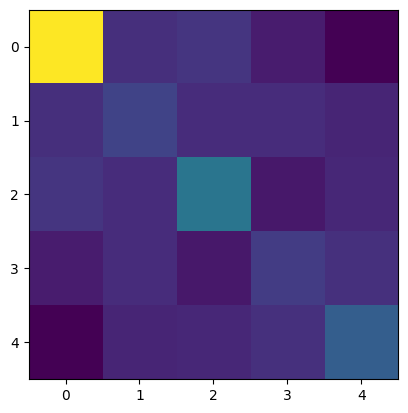

In [3]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

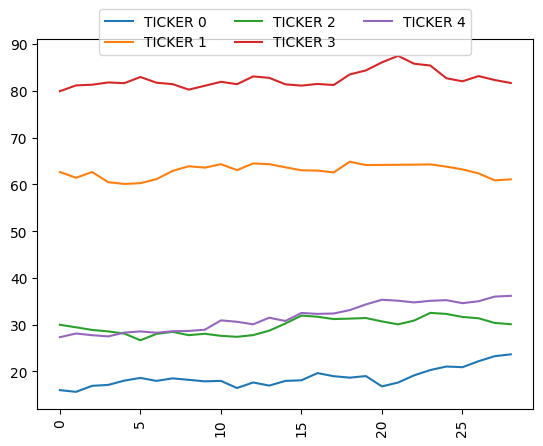

In [4]:
display_stocks_graph(data)

#### Get Yahoo Finance Data

In [5]:
from yahoo_data_provider import get_yahoo_data

stocks = ["MSFT","CAT","MMM","AXP","AMGN","BA"]
start_date=(2018, 1, 1)
end_date=(2024, 1, 30)

data, tickers, mu, sigma = get_yahoo_data(stocks, start_date, end_date)

print("Stocks: ", stocks)
print("Mean return: ", mu)
print("Covariance: ", sigma)

Stocks:  ['MSFT', 'CAT', 'MMM', 'AXP', 'AMGN', 'BA']
Mean return:  [ 0.00124667  0.00073916 -0.00025689  0.00077279  0.00061684  0.00024492]
Covariance:  [[0.00035665 0.00015617 0.00013543 0.00020972 0.00013415 0.00022855]
 [0.00015617 0.00042023 0.00021809 0.00027203 0.00012278 0.00031275]
 [0.00013543 0.00021809 0.00029845 0.00020208 0.00011338 0.00021007]
 [0.00020972 0.00027203 0.00020208 0.00050871 0.00012002 0.00042724]
 [0.00013415 0.00012278 0.00011338 0.00012002 0.00024804 0.00010241]
 [0.00022855 0.00031275 0.00021007 0.00042724 0.00010241 0.00090923]]


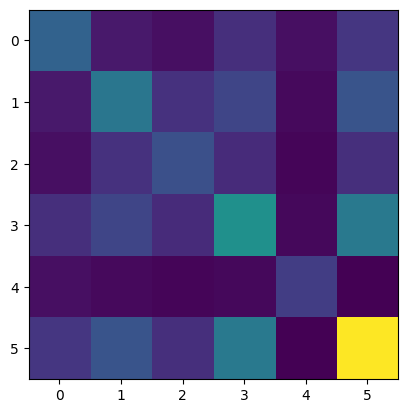

In [6]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

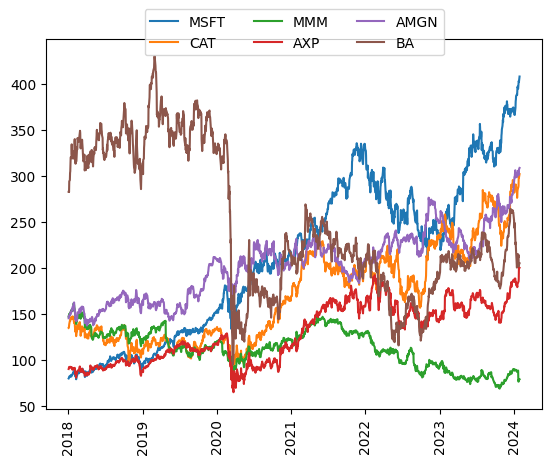

In [7]:
display_stocks_graph(data)

### Define Portfolio Optimization Problem

In [8]:
from portfolio import define_portfolio_optimization_problem

q = 0.5  # set risk factor
budget = 3  # set budget

portfolio, portfolio_quadratic_program = define_portfolio_optimization_problem(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget)
print("Portfolio Quadratic Program: ", portfolio_quadratic_program)

Portfolio Quadratic Program:  minimize 0.0001783269228940253*x_0^2 + 0.00015616666366968982*x_0*x_1 + 0.00013543464496759474*x_0*x_2 + 0.00020972088983407442*x_0*x_3 + 0.00013415445402252925*x_0*x_4 + 0.00022854964515038682*x_0*x_5 + 0.00021011340556013783*x_1^2 + 0.0002180858979575467*x_1*x_2 + 0.00027203371596812087*x_1*x_3 + 0.00012277776948142847*x_1*x_4 + 0.0003127484342635376*x_1*x_5 + 0.00014922293165908987*x_2^2 + 0.00020207910557525977*x_2*x_3 + 0.00011338051252524124*x_2*x_4 + 0.0002100717651147544*x_2*x_5 + 0.0002543527010671376*x_3^2 + 0.00012001527035170517*x_3*x_4 + 0.00042724256251674584*x_3*x_5 + 0.00012401901715711832*x_4^2 + 0.00010241279145839861*x_4*x_5 + 0.0004546126455488805*x_5^2 - 0.001246672854871088*x_0 - 0.0007391614363525345*x_1 + 0.000256885770454653*x_2 - 0.0007727870703547219*x_3 - 0.0006168430235822725*x_4 - 0.0002449244155697743*x_5 (6 variables, 1 constraints, 'Portfolio optimization')


### Solve the portfolio optimization problem

#### Solve using NumPyMinimumEigensolver (as a classical reference)

In [9]:
from solver import solve_using_numpy_minimum_eigensolver

result = solve_using_numpy_minimum_eigensolver(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1. 0.], value -0.0017
Optimal Companies: ['MSFT', 'CAT', 'AMGN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 1 0 0 1 0]	-0.0017		1.0000


#### Solve using Solution using `SamplingVQE`

In [10]:
from solver import solve_using_sampling_vqe

num_stocks = len(stocks)
result = solve_using_sampling_vqe(portfolio_quadratic_program, num_stocks)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1. 0.], value -0.0017
Optimal Companies: ['MSFT', 'CAT', 'AMGN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 0 1 0 1 0]	-0.0008		0.4219
[1 0 0 0 1 1]	-0.0009		0.2012
[0 0 1 0 1 1]	0.0005		0.1406
[1 0 1 1 1 0]	-0.0008		0.0361
[1 1 1 0 1 0]	-0.0008		0.0322
[1 0 0 1 1 1]	-0.0006		0.0176
[0 0 1 1 1 1]	0.0008		0.0156
[0 0 1 0 1 0]	0.0000		0.0156
[0 1 1 0 1 0]	-0.0002		0.0146
[1 0 0 0 1 0]	-0.0014		0.0117
[0 0 0 0 1 0]	-0.0005		0.0117
[1 0 1 0 0 1]	0.0001		0.0107
[0 1 1 0 0 1]	0.0008		0.0098
[1 0 0 0 0 0]	-0.0011		0.0068
[1 1 0 0 1 0]	-0.0017		0.0059
[1 0 1 0 1 1]	-0.0000		0.0059
[0 1 0 0 1 1]	-0.0003		0.0049
[0 0 0 0 1 1]	-0.0002		0.0049
[0 0 0 1 1 1]	-0.0002		0.0049
[0 1 1 0 1 1]	0.0007		0.0029
[1 0 0 1 1 0]	-0.0016		0.0029
[1 0 1 0 0 0]	-0.0005		0.0029
[0 0 1 0 0 1]	0.0008		0.0029
[0 1 1 1 0 1]	0.0012		0.0020
[0 0 1 1 1 0]	-0.0002		0.0020
[1 0 1 1 0 1]	0.0004		0.002

#### Solve using Solution using `QAOA`

In [11]:
from solver import solve_using_qaoa

num_stocks = len(stocks)
result = solve_using_qaoa(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1. 0.], value -0.0017
Optimal Companies: ['MSFT', 'CAT', 'AMGN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 1 0 0 1 0]	-0.0017		0.0566
[1 0 0 0 1 1]	-0.0009		0.0557
[0 0 0 1 1 1]	-0.0002		0.0508
[1 1 1 0 0 0]	-0.0007		0.0498
[1 0 0 1 1 0]	-0.0016		0.0488
[1 0 0 1 0 1]	-0.0005		0.0479
[0 1 0 1 0 1]	0.0002		0.0479
[0 0 1 0 1 1]	0.0005		0.0469
[0 1 0 1 1 0]	-0.0010		0.0459
[0 0 1 1 0 1]	0.0009		0.0459
[0 1 1 0 1 0]	-0.0002		0.0449
[0 1 1 1 0 0]	0.0001		0.0430
[1 0 1 0 1 0]	-0.0008		0.0430
[0 1 0 0 1 1]	-0.0003		0.0410
[1 1 0 1 0 0]	-0.0015		0.0391
[0 1 1 0 0 1]	0.0008		0.0361
[1 1 0 0 0 1]	-0.0007		0.0361
[0 0 1 1 1 0]	-0.0002		0.0352
[1 0 1 0 0 1]	0.0001		0.0352
[1 0 1 1 0 0]	-0.0006		0.0342
[0 1 1 0 1 1]	0.0007		0.0049
[1 0 1 1 1 0]	-0.0008		0.0049
[0 0 1 1 1 1]	0.0008		0.0049
[0 1 1 0 0 0]	0.0001		0.0049
[1 0 1 0 1 1]	-0.0000		0.0049
[0 1 1 1 0 1]	0.0012		0.0049